In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/americaData.csv')
data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
0,0,United States of America,971002,24632468,0,10845438,410378,2021/1/22 23:40
1,1,United States of America,971002,24632468,0,10845438,410378,2021/1/22 20:56
2,2,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:16
3,3,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:14
4,4,United States of America,971002,24619597,0,10845438,409877,2021/1/22 15:21
5,5,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:40
6,6,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:13
7,7,United States of America,971002,24432829,0,10562082,406001,2021/1/22 11:04
8,8,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:23
9,9,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:02


In [4]:
data['updateTime'] = pd.to_datetime(data['updateTime'])

data = data[::-1]

data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
2566,2566,United States of America,971002,5,0,0,0,2020-01-27 17:20:00
2565,2565,United States of America,971002,6,0,0,0,2020-01-31 07:17:00
2564,2564,United States of America,971002,6,0,0,0,2020-02-01 02:48:00
2563,2563,United States of America,971002,8,0,0,0,2020-02-02 07:41:00
2562,2562,United States of America,971002,9,0,0,0,2020-02-03 09:28:00
2561,2561,United States of America,971002,11,0,0,0,2020-02-04 07:11:00
2560,2560,United States of America,971002,12,0,0,0,2020-02-06 10:59:00
2559,2559,United States of America,971002,12,0,0,0,2020-02-10 14:08:00
2558,2558,United States of America,971002,12,0,0,0,2020-02-10 15:19:00
2557,2557,United States of America,971002,12,0,0,0,2020-02-10 15:27:00


In [12]:
data = data[['updateTime', 'province_confirmedCount']]
data.reset_index(drop=True, inplace=True)
data.head(10)

,updateTime,province_confirmedCount
0,2020-01-27 17:20:00,5
1,2020-01-31 07:17:00,6
2,2020-02-01 02:48:00,6
3,2020-02-02 07:41:00,8
4,2020-02-03 09:28:00,9
5,2020-02-04 07:11:00,11
6,2020-02-06 10:59:00,12
7,2020-02-10 14:08:00,12
8,2020-02-10 15:19:00,12
9,2020-02-10 15:27:00,12


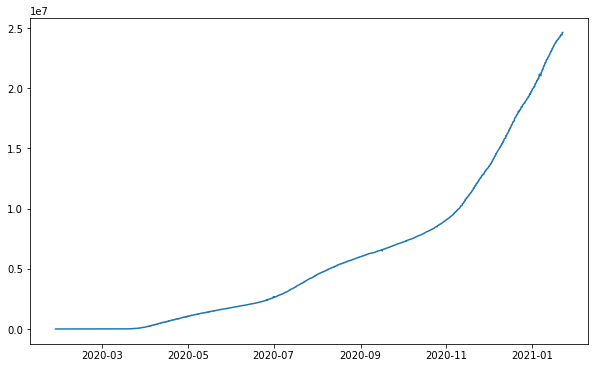

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['updateTime'], data['province_confirmedCount'])